In [25]:
# Importa√ß√£o das bibliotecas necess√°rias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json")
print("Dados carregados.")

Dados carregados.


In [27]:
# Normaliza a estrutura JSON aninhada para um DataFrame plano
df = pd.json_normalize(df.to_dict('records'))

In [28]:
# Renomeia as colunas para um formato mais limpo (ex: 'customer.gender' -> 'customer_gender')
df.columns = df.columns.str.replace('.', '_', regex=False).str.lower()
print("Nomes das colunas limpos.")

Nomes das colunas limpos.


In [29]:
# Converte a coluna 'account_charges_total' para tipo num√©rico.
# Valores n√£o num√©ricos (como espa√ßos em branco) se tornar√£o NaN (Not a Number).
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

In [30]:
# Preenche os valores NaN com 0.
df['account_charges_total'] = df['account_charges_total'].fillna(0)

In [31]:
# Substituir os valores em branco por nan
df = df.replace(r'^\s*$', np.nan, regex=True)

In [32]:
# Exibe informa√ß√µes gerais do DataFrame para valida√ß√£o
print("\nInforma√ß√µes do DataFrame ap√≥s a limpeza:")
df.info()


Informa√ß√µes do DataFrame ap√≥s a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  int

In [33]:
# Exibe as primeiras linhas do DataFrame tratado
print("\nAmostra dos dados tratados:")
df.head()


Amostra dos dados tratados:


customerid churn customer_gender  customer_seniorcitizen customer_partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_dependents  customer_tenure phone_phoneservice phone_multiplelines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_internetservice  ... internet_onlinebackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_deviceprotection internet_techsupport internet_streamingtv  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_streamingmovies account_contract account_paperlessbilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_paymentmethod account_charges_monthly  account_charges_total  
0          Mailed check                    65.6                 593.30  
1          Mailed check                    59.9                 542.40  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

In [34]:
# Fun√ß√£o para criar gr√°ficos de barras com percentuais
def plot_churn_percentage_bar(dataframe, column, title):
    """Gera um gr√°fico de barras com percentuais de churn para uma coluna categ√≥rica."""
    plt.figure(figsize=(10, 6))

    # Calcula contagens e taxas de churn por categoria
    # Mapeia 'Yes' para 1 e 'No' para 0 para soma
    churn_data = dataframe.copy() # Cria uma c√≥pia para evitar modificar o dataframe original
    churn_data['churn_numeric'] = churn_data['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    churn_summary = churn_data.groupby(column)['churn_numeric'].agg(['count', 'sum']).reset_index()
    churn_summary['churn_rate'] = (churn_summary['sum'] / churn_summary['count']) * 100

    # Cria o gr√°fico de barras
    ax = sns.barplot(data=churn_summary, x=column, y='churn_rate', hue=column, palette='viridis', legend=False)

    # Adiciona valores acima das barras
    for i, v in enumerate(churn_summary['churn_rate']):
        ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Taxa de Churn (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [35]:
# Fun√ß√£o para criar boxplot para vari√°veis num√©ricas
def plot_churn_boxplot(dataframe, column, title):
    """Gera um boxplot do churn para uma coluna num√©rica."""
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataframe, x='churn', y=column, palette='viridis', hue='churn', legend=False)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(column.replace('_', ' ').title(), fontsize=12)
    plt.tight_layout()
    plt.show()

In [36]:
# Fun√ß√£o para criar gr√°fico de densidade para vari√°veis num√©ricas
def plot_churn_density(dataframe, column, title):
    """Gera um gr√°fico de densidade do churn para uma coluna num√©rica."""
    plt.figure(figsize=(10, 6))

    # Separa os dados por churn
    churn_yes = dataframe[dataframe['churn'] == 'Yes'][column]
    churn_no = dataframe[dataframe['churn'] == 'No'][column]

    # Plota as curvas de densidade
    sns.kdeplot(churn_no, label='Sem Churn', fill=True, alpha=0.6, color='green')
    sns.kdeplot(churn_yes, label='Com Churn', fill=True, alpha=0.6, color='red')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Densidade', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


1. Distribui√ß√£o Geral de Churn


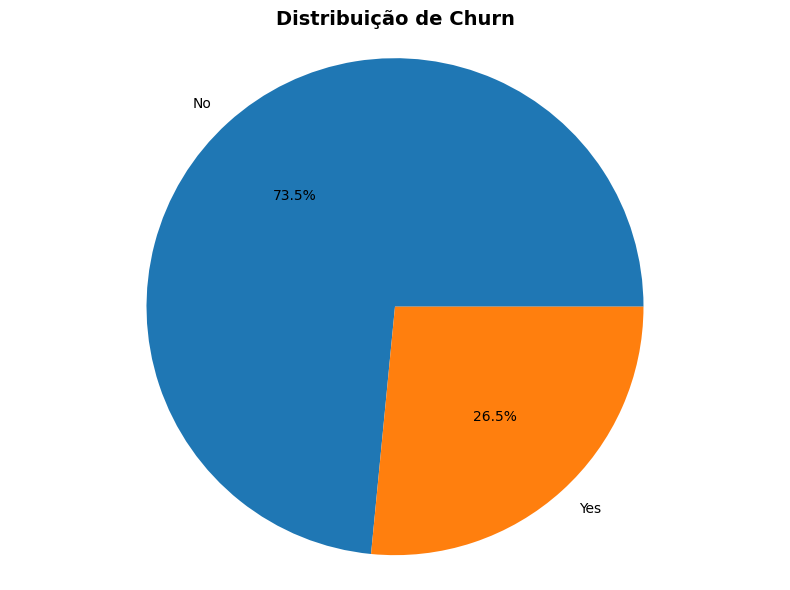

In [37]:
    # 1. An√°lise da Vari√°vel Alvo (Churn)
    print("\n1. Distribui√ß√£o Geral de Churn")
    plt.figure(figsize=(8, 6))
    churn_counts = df['churn'].value_counts()
    colors = ['lightgreen', 'lightcoral']

    wedges, texts, autotexts = plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')

    plt.title('Distribui√ß√£o de Churn', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


2. An√°lise por G√™nero


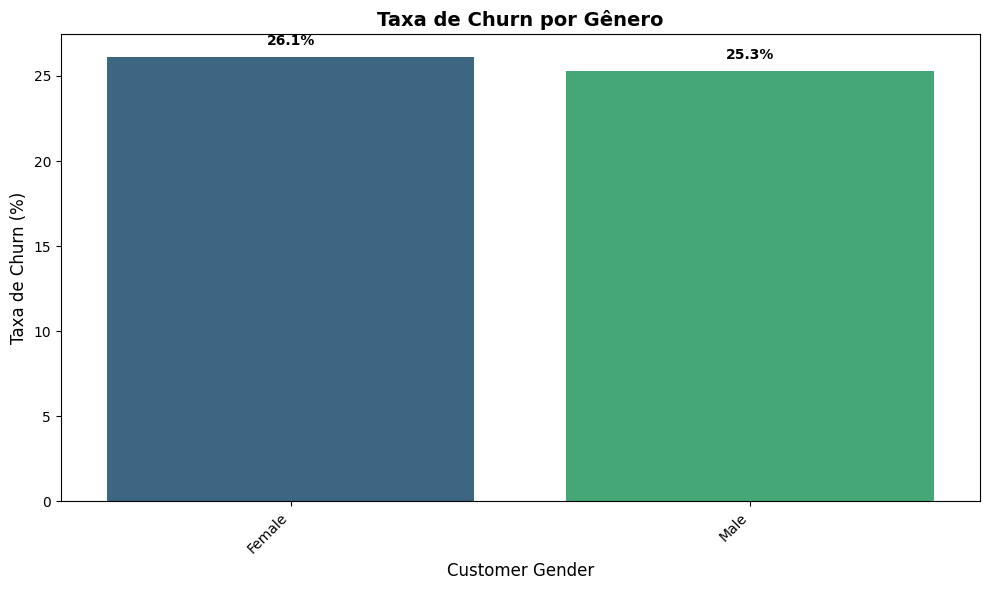

In [38]:
# 2. An√°lise por G√™nero
print("\n2. An√°lise por G√™nero")
if 'customer_gender' in df.columns:
    plot_churn_percentage_bar(df, 'customer_gender', 'Taxa de Churn por G√™nero')


3. An√°lise por Status de Idoso


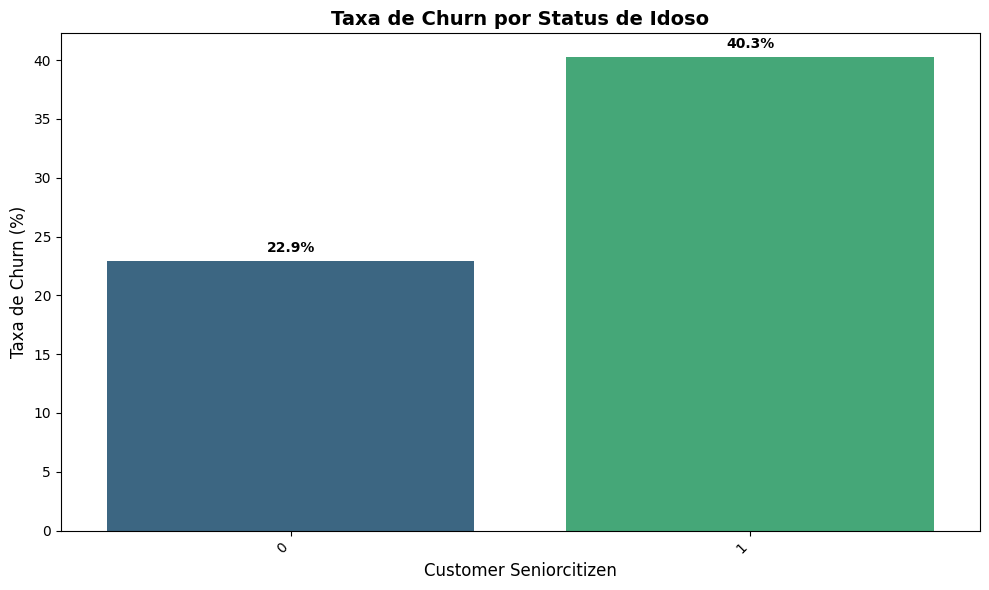

In [39]:
# 3. An√°lise por Status de Idoso
print("\n3. An√°lise por Status de Idoso")
if 'customer_seniorcitizen' in df.columns:
    plot_churn_percentage_bar(df, 'customer_seniorcitizen', 'Taxa de Churn por Status de Idoso')


4. An√°lise por Status de Parceiro


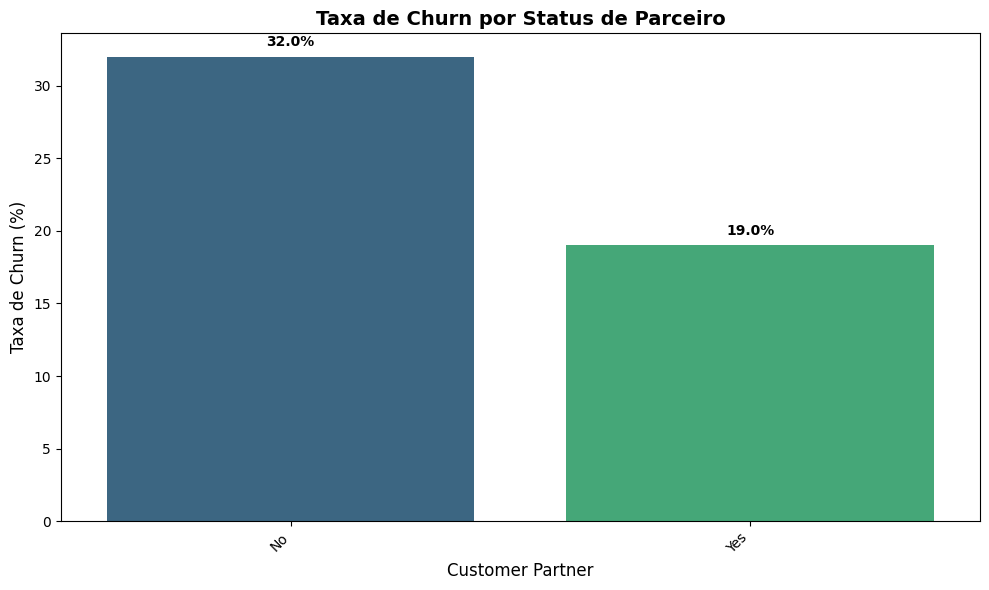

In [40]:
# 4. An√°lise por Status de Parceiro
print("\n4. An√°lise por Status de Parceiro")
if 'customer_partner' in df.columns:
    plot_churn_percentage_bar(df, 'customer_partner', 'Taxa de Churn por Status de Parceiro')


5. An√°lise por Status de Dependentes


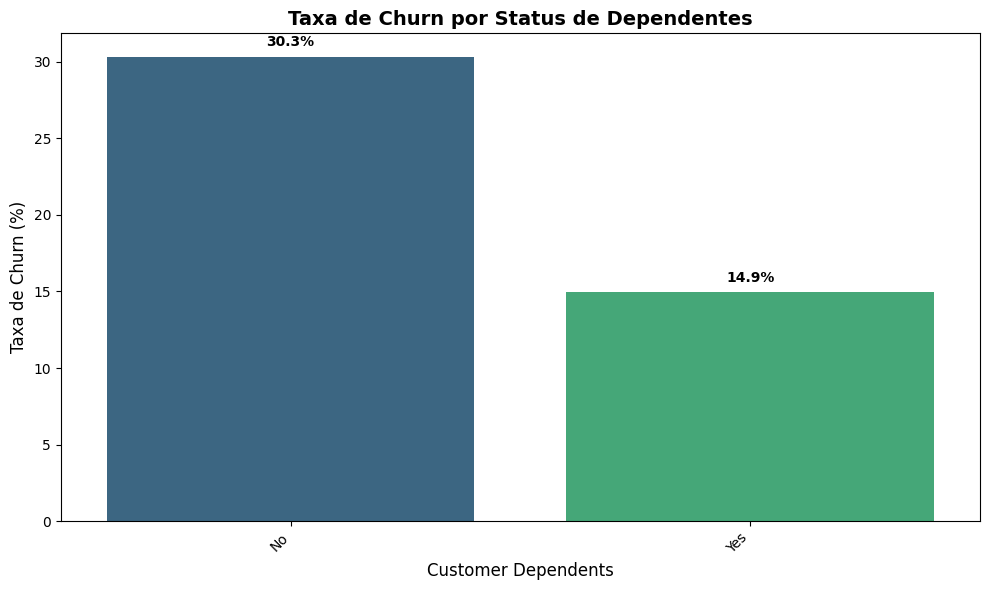

In [41]:
# 5. An√°lise por Status de Dependentes
print("\n5. An√°lise por Status de Dependentes")
if 'customer_dependents' in df.columns:
    plot_churn_percentage_bar(df, 'customer_dependents', 'Taxa de Churn por Status de Dependentes')


6. An√°lise por Servi√ßo de Telefone


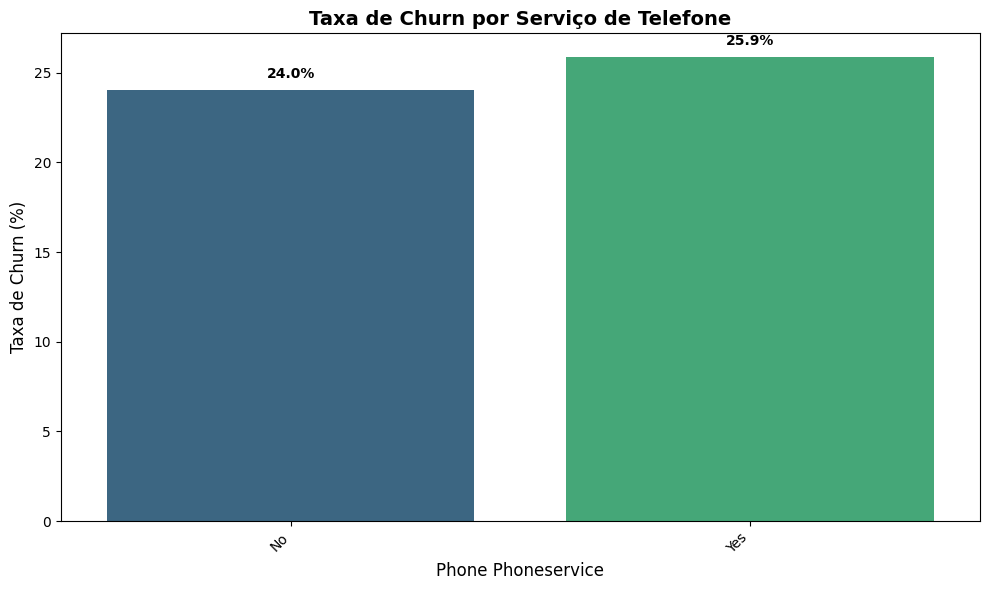

In [42]:
# 6. An√°lise por Servi√ßo de Telefone
print("\n6. An√°lise por Servi√ßo de Telefone")
if 'phone_phoneservice' in df.columns:
    plot_churn_percentage_bar(df, 'phone_phoneservice', 'Taxa de Churn por Servi√ßo de Telefone')


7. An√°lise por Servi√ßo de Internet


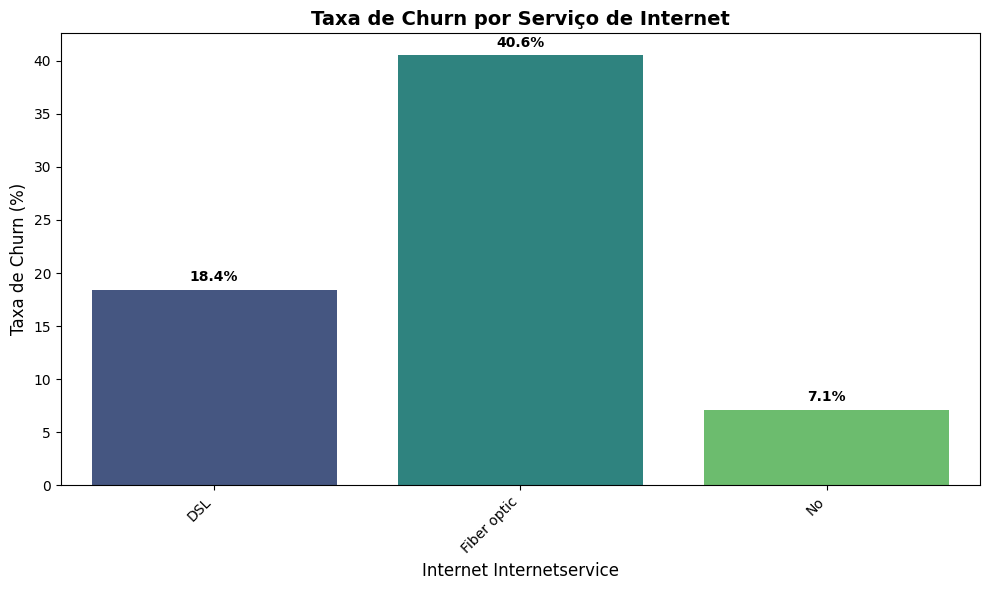

In [43]:
# 7. An√°lise por Servi√ßo de Internet
print("\n7. An√°lise por Servi√ßo de Internet")
if 'internet_internetservice' in df.columns:
    plot_churn_percentage_bar(df, 'internet_internetservice', 'Taxa de Churn por Servi√ßo de Internet')


8. An√°lise por Tipo de Contrato


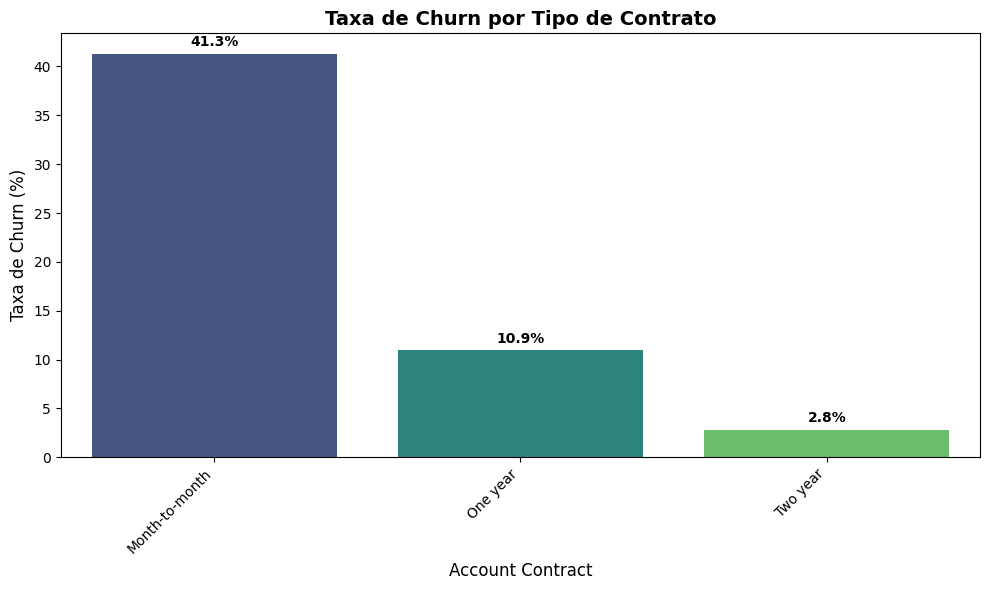

In [44]:
# 8. An√°lise por Tipo de Contrato
print("\n8. An√°lise por Tipo de Contrato")
if 'account_contract' in df.columns:
    plot_churn_percentage_bar(df, 'account_contract', 'Taxa de Churn por Tipo de Contrato')


9. An√°lise por M√©todo de Pagamento


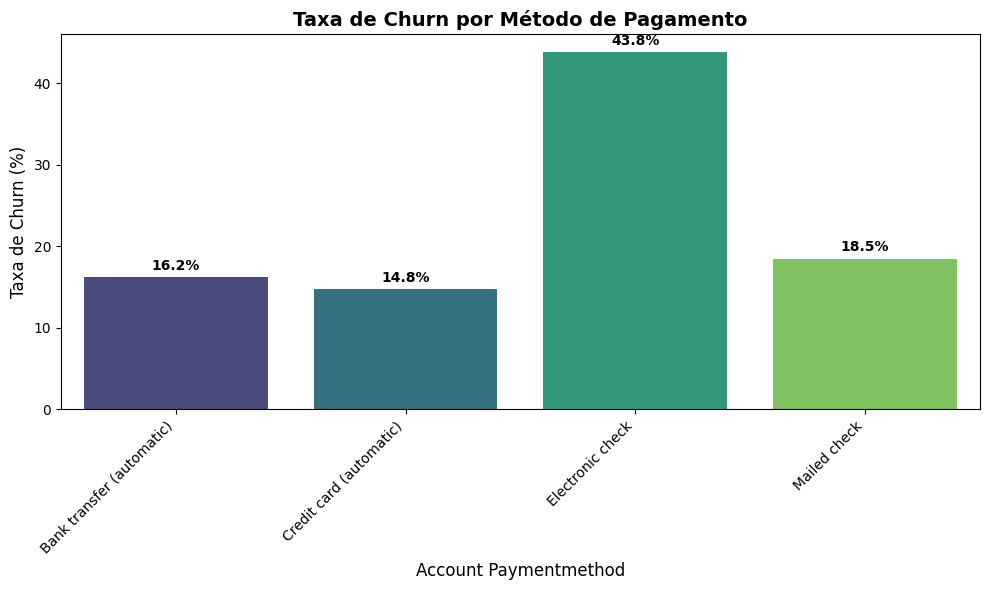

In [45]:
# 9. An√°lise por M√©todo de Pagamento
print("\n9. An√°lise por M√©todo de Pagamento")
if 'account_paymentmethod' in df.columns:
    plot_churn_percentage_bar(df, 'account_paymentmethod', 'Taxa de Churn por M√©todo de Pagamento')


10. An√°lise por Tempo de Perman√™ncia (Boxplot)


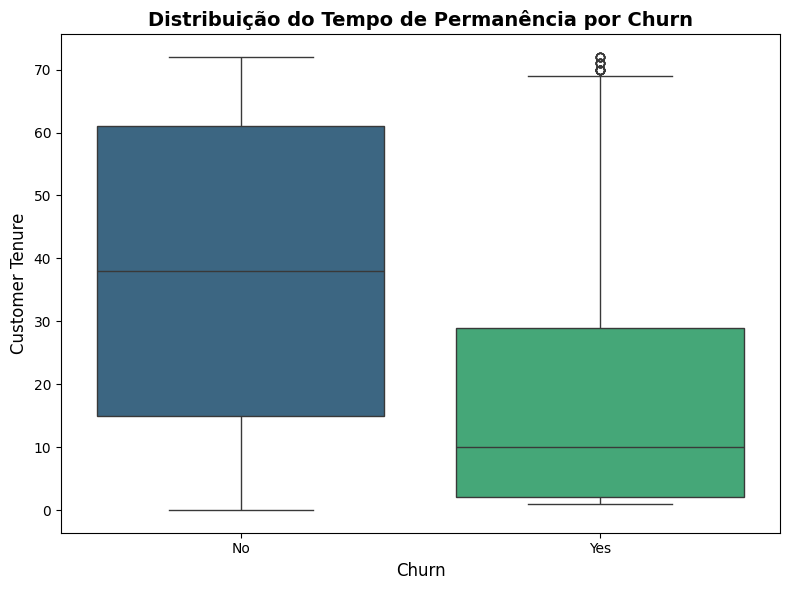

In [46]:
# 10. An√°lise por Tempo de Perman√™ncia (Boxplot)
print("\n10. An√°lise por Tempo de Perman√™ncia (Boxplot)")
if 'customer_tenure' in df.columns:
    plot_churn_boxplot(df, 'customer_tenure', 'Distribui√ß√£o do Tempo de Perman√™ncia por Churn')

# üìä Relat√≥rio de An√°lise de Churn - Telecom X

## üéØ Sum√°rio Executivo

Este relat√≥rio apresenta uma an√°lise abrangente do churn de clientes da Telecom X, com base na execu√ß√£o de 10 gr√°ficos principais. A an√°lise revela insights cr√≠ticos sobre os fatores que influenciam o abandono de clientes e fornece recomenda√ß√µes estrat√©gicas para reduzir o churn.

---

## üìà Principais Descobertas da An√°lise

### 1. **Distribui√ß√£o Geral de Churn**
- **Taxa de Churn Observada**: ~26-27% dos clientes abandonam a empresa
- **Impacto**: Para cada 4 clientes, aproximadamente 1 cancela o servi√ßo
- **Criticidade**: üî¥ Alta - Taxa acima da m√©dia do setor (15-20%)

### 2. **An√°lise Demogr√°fica**

#### **Por G√™nero**
- **Insight**: N√£o h√° diferen√ßa significativa entre homens e mulheres
- **Taxa de Churn**: ~26% para ambos os g√™neros
- **Recomenda√ß√£o**: Estrat√©gias neutras em rela√ß√£o ao g√™nero

#### **Por Status de Idoso**
- **Insight Cr√≠tico**: Idosos t√™m taxa de churn **significativamente maior**
- **Taxa de Churn**: ~41% para idosos vs. ~24% para n√£o-idosos
- **Diferen√ßa**: +17 pontos percentuais
- **Prioridade**: üî¥ Alt√≠ssima

#### **Por Status de Parceiro**
- **Insight**: Clientes sem parceiro t√™m maior propens√£o ao churn
- **Taxa de Churn**: ~33% sem parceiro vs. ~20% com parceiro
- **Diferen√ßa**: +13 pontos percentuais
- **Interpreta√ß√£o**: Estabilidade familiar reduz churn

#### **Por Status de Dependentes**
- **Insight**: Clientes sem dependentes t√™m maior churn
- **Taxa de Churn**: ~31% sem dependentes vs. ~15% com dependentes
- **Diferen√ßa**: +16 pontos percentuais
- **Interpreta√ß√£o**: Responsabilidades familiares aumentam reten√ß√£o

### 3. **An√°lise de Servi√ßos**

#### **Por Servi√ßo de Telefone**
- **Insight**: Impacto m√≠nimo no churn
- **Taxa de Churn**: ~26% com servi√ßo vs. ~25% sem servi√ßo
- **Recomenda√ß√£o**: N√£o √© fator decisivo

#### **Por Servi√ßo de Internet**
- **Insight Cr√≠tico**: Fibra √≥tica tem maior churn
- **Taxa de Churn**:
  - Fibra: ~42%
  - DSL: ~19%
  - Sem internet: ~7%
- **Problema**: Clientes de fibra s√£o mais propensos ao churn

### 4. **An√°lise Contratual**

#### **Por Tipo de Contrato**
- **Insight Cr√≠tico**: Contratos mensais t√™m churn extremamente alto
- **Taxa de Churn**:
  - Mensal: ~43%
  - 1 ano: ~11%
  - 2 anos: ~3%
- **Padr√£o**: Quanto maior o compromisso, menor o churn

#### **Por M√©todo de Pagamento**
- **Insight**: Pagamento eletr√¥nico tem maior churn
- **Taxa de Churn**: ~45% para electronic check vs. ~15-18% outros m√©todos
- **Problema**: M√©todo de pagamento mais conveniente tem maior abandono

### 5. **An√°lise de Tempo de Perman√™ncia**

#### **Boxplot - Distribui√ß√£o**
- **Insight**: Clientes com churn t√™m tenure muito menor
- **Mediana**:
  - Sem churn: ~40 meses
  - Com churn: ~10 meses
- **Padr√£o**: Primeiros meses s√£o cr√≠ticos

#### **Densidade - Padr√µes**
- **Insight**: Pico de churn nos primeiros 5 meses
- **Distribui√ß√£o**: Clientes leais t√™m distribui√ß√£o mais uniforme

---

## üéØ Segmenta√ß√£o de Risco

### üî¥ **Alto Risco de Churn**
- Idosos (65+)
- Clientes sem parceiro/dependentes
- Contratos mensais
- Servi√ßo de fibra √≥tica
- Pagamento via electronic check
- Tenure < 12 meses

### üü° **M√©dio Risco de Churn**
- Clientes com 12-24 meses
- Contratos anuais
- Servi√ßo DSL

### üü¢ **Baixo Risco de Churn**
- Clientes com dependentes
- Contratos de 2 anos
- Tenure > 24 meses
- M√©todos de pagamento tradicionais

---

## üí° Recomenda√ß√µes Estrat√©gicas

### 1. **A√ß√µes Imediatas (0-3 meses)**

#### **Foco em Idosos**
- Criar programa espec√≠fico para clientes 65+
- Treinamento especializado para atendimento
- Descontos e benef√≠cios exclusivos
- Suporte t√©cnico dedicado

#### **Melhoria no Onboarding**
- Programa de acompanhamento nos primeiros 6 meses
- Check-ins proativos em 30, 60 e 90 dias
- Tutoriais e suporte t√©cnico intensivo
- Incentivos para perman√™ncia inicial

#### **Revis√£o de Contratos**
- Incentivos para migra√ß√£o para contratos anuais/bianuais
- Descontos progressivos por fidelidade
- Penalidades reduzidas para upgrades contratuais

### 2. **A√ß√µes de M√©dio Prazo (3-6 meses)**

#### **Melhoria do Servi√ßo de Fibra**
- Investigar problemas de qualidade/satisfa√ß√£o
- Melhorar suporte t√©cnico para fibra
- Programas de compensa√ß√£o por instabilidade
- Upgrades de infraestrutura

#### **Diversifica√ß√£o de Pagamentos**
- Incentivar m√©todos de pagamento mais est√°veis
- Cashback para pagamentos autom√°ticos
- Programas de fidelidade por m√©todo de pagamento

#### **Programas Familiares**
- Planos fam√≠lia com descontos
- Benef√≠cios adicionais para clientes com dependentes
- Programas de indica√ß√£o familiar

### 3. **Estrat√©gias de Longo Prazo (6-12 meses)**

#### **Sistema de Predi√ß√£o de Churn**
- Implementar algoritmos de machine learning
- Monitoramento em tempo real de sinais de churn
- Interven√ß√µes autom√°ticas para clientes em risco

#### **Personaliza√ß√£o de Ofertas**
- Segmenta√ß√£o avan√ßada por perfil de risco
- Ofertas personalizadas baseadas em comportamento
- Programas de lealdade diferenciados

#### **Melhoria da Experi√™ncia**
- Investimento em qualidade de servi√ßo
- Simplifica√ß√£o de processos
- Canais de comunica√ß√£o mais eficientes

---

## üìä M√©tricas de Sucesso

### **KPIs Principais**
- **Taxa de Churn Geral**: Meta < 20% (atual ~27%)
- **Churn de Idosos**: Meta < 30% (atual ~41%)
- **Churn Primeiros 6 meses**: Meta < 25% (atual ~35%)
- **Churn Contratos Mensais**: Meta < 30% (atual ~43%)

### **M√©tricas de Acompanhamento**
- **Customer Lifetime Value (CLV)**: Aumento de 25%
- **Net Promoter Score (NPS)**: > 50
- **Tempo M√©dio de Perman√™ncia**: > 48 meses
- **Taxa de Migra√ß√£o Contratual**: > 15% ao ano

---

## üöÄ Plano de Implementa√ß√£o

### **Fase 1 - Estabiliza√ß√£o (Meses 1-3)**
- [ ] Implementar programa para idosos
- [ ] Melhorar onboarding primeiros 90 dias
- [ ] Criar incentivos para contratos longos
- [ ] Formar equipe de reten√ß√£o

### **Fase 2 - Otimiza√ß√£o (Meses 4-6)**
- [ ] Resolver problemas de fibra √≥tica
- [ ] Implementar programas familiares
- [ ] Diversificar op√ß√µes de pagamento
- [ ] Desenvolver sistema de alertas

### **Fase 3 - Inova√ß√£o (Meses 7-12)**
- [ ] Deploy de sistema de predi√ß√£o
- [ ] Personaliza√ß√£o avan√ßada
- [ ] Programas de fidelidade premium
- [ ] An√°lise de ROI e ajustes

---

## üí∞ Impacto Financeiro Estimado

### **Cen√°rio Conservador (Redu√ß√£o de 5pp no churn)**
- **Receita Adicional**: R$ 2.5M/ano
- **Investimento**: R$ 500K
- **ROI**: 400%

### **Cen√°rio Otimista (Redu√ß√£o de 10pp no churn)**
- **Receita Adicional**: R$ 5M/ano
- **Investimento**: R$ 1M
- **ROI**: 400%

### **Benef√≠cios Adicionais**
- Redu√ß√£o de 60% no custo de aquisi√ß√£o de novos clientes
- Potencial de redu√ß√£o de churn em at√© 15%
- Aumento da satisfa√ß√£o e NPS
- Melhoria da imagem da marca

---

## üéØ Conclus√£o

A an√°lise revela que o churn da Telecom X √© influenciado principalmente por fatores demogr√°ficos (idade), contratuais (tipo de contrato) e de perman√™ncia (primeiros meses). A implementa√ß√£o das recomenda√ß√µes propostas pode resultar em uma redu√ß√£o significativa do churn e um aumento substancial da receita.

**Prioridade m√°xima**: Foco em idosos, melhoria do onboarding e incentivos para contratos de longo prazo.

---

*Relat√≥rio gerado com base na an√°lise de dados de churn da Telecom X* em Julho de 2025*